<a href="https://colab.research.google.com/github/igrosny/csca5622/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Topic

This project aims to develop a machine learning model capable of accurately classifying wine quality. By leveraging a dataset containing various physicochemical features of wines, such as acidity, sugar content, pH, and alcohol level, the model will learn to predict a wine's quality rating. This classification will be achieved through supervised learning techniques, where the model is trained on labeled data to recognize patterns and correlations between the input features and the corresponding quality scores. Ultimately, this tool will provide a means to objectively assess wine quality based on measurable attributes, potentially aiding wine producers and consumers alike.

Type: Multivariate supervised machine learning model for Binary Classification

# Data

## Source

https://archive.ics.uci.edu/dataset/186/wine+quality


The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

## Columns Description
1. fixed acidity: most acids involved with wine or
fixed or nonvolatile (do not evaporate readily)
2. volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides: the amount of salt in the wine
6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density: the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. alcohol: the percent alcohol content of the wine
12. quality: (score between 0 and 10)

In [1]:
# install the module for downloading the dataset
!pip install ucimlrepo

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:


# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

In [3]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
# Display a concise summary of the structure
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [6]:
# Provide summary statistics
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


# Data Cleaning

The data should be already clean because from where I got it, but just to be sure I want see if there is any null values

In [7]:
# Check for missing values in the entire DataFrame
missing_values = X.isnull().sum()
print(missing_values)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


Conclusion: Data seems Okay and we have left 6497 instances and 11 features

# Exploratory Data Analysis

Analyzing the target variable

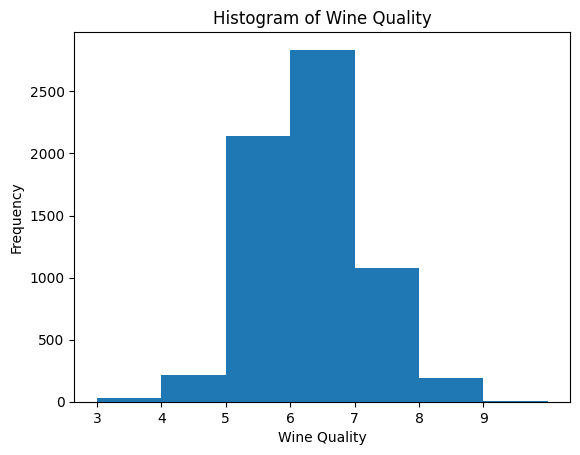

In [9]:
# plot an histogram of y


plt.hist(y['quality'], bins=range(y['quality'].min(), y['quality'].max()+2))
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality')
plt.xticks(range(y['quality'].min(), y['quality'].max()+1))
plt.show()


In [10]:
y.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [11]:
y.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [13]:
y_new = pd.Series(np.where(y['quality'] < 7, 0, 1))


In [14]:
# Concatenate X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

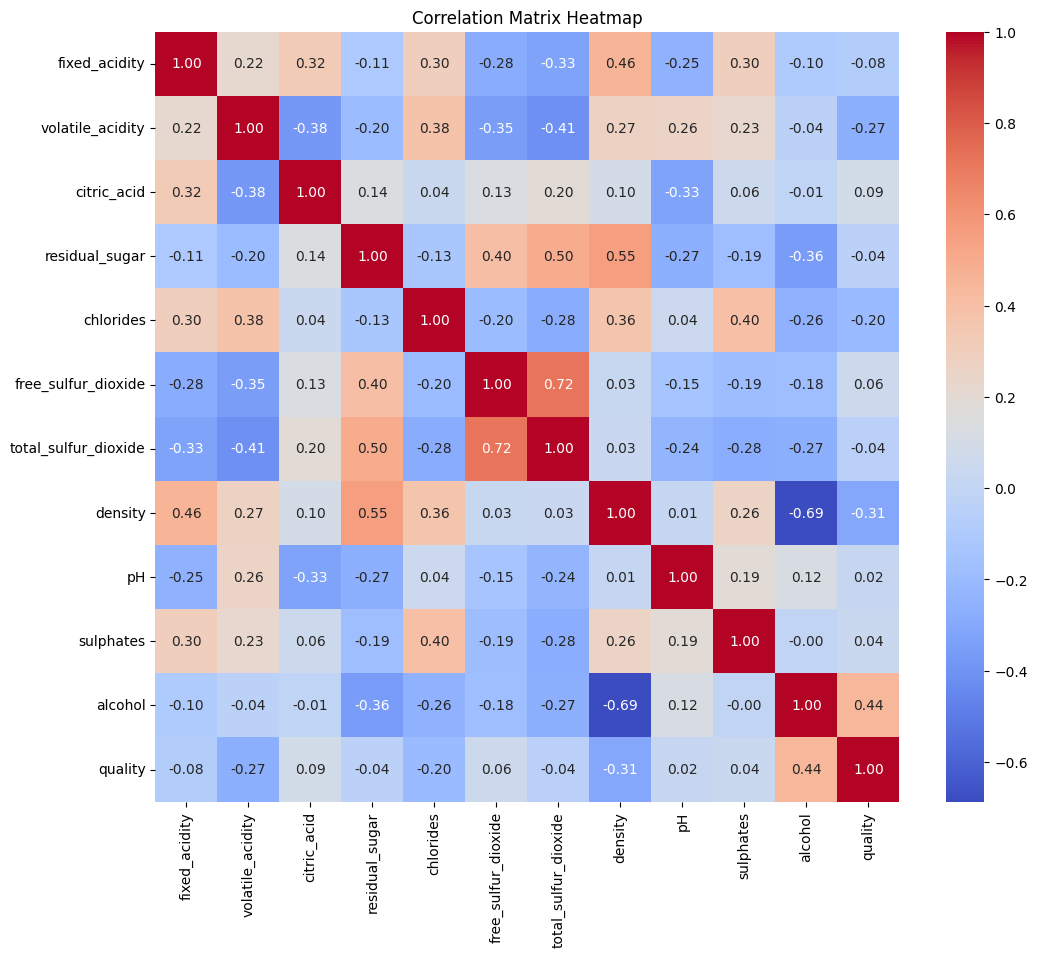

In [16]:
# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Strong Positive Correlations (Dark Red)**

* total_sulfur_dioxide and free_sulfur_dioxide (0.72):
This indicates that as the amount of free sulfur dioxide increases, the total sulfur dioxide also tends to increase. This makes sense as free sulfur dioxide is a component of total sulfur dioxide.
* density and residual_sugar (0.55): This suggests that wines with higher residual sugar content tend to have higher densities.
* density and fixed_acidity (0.46): This indicates that wines with higher fixed acidity tend to have higher densities.

**Strong Negative Correlations (Dark Blue)**

* density and alcohol (-0.69): This is a strong negative correlation, suggesting that wines with higher alcohol content tend to have lower densities.
* volatile_acidity and citric_acid (-0.38): This indicates that wines with higher volatile acidity tend to have lower citric acid content.
* total_sulfur_dioxide and volatile_acidity (-0.41): This suggests that wines with higher volatile acidity tend to have lower total sulfur dioxide.

**Moderate Correlations**

* chlorides and fixed_acidity (0.30): Moderate positive correlation.
chlorides and volatile_acidity (0.38): Moderate positive correlation.
* quality and alcohol (0.44): Moderate positive correlation, suggesting that higher alcohol content is associated with higher wine quality (though correlation doesn't imply causation).
* pH and fixed_acidity (-0.25): Moderate negative correlation, indicating that wines with higher fixed acidity tend to have lower pH (more acidic).

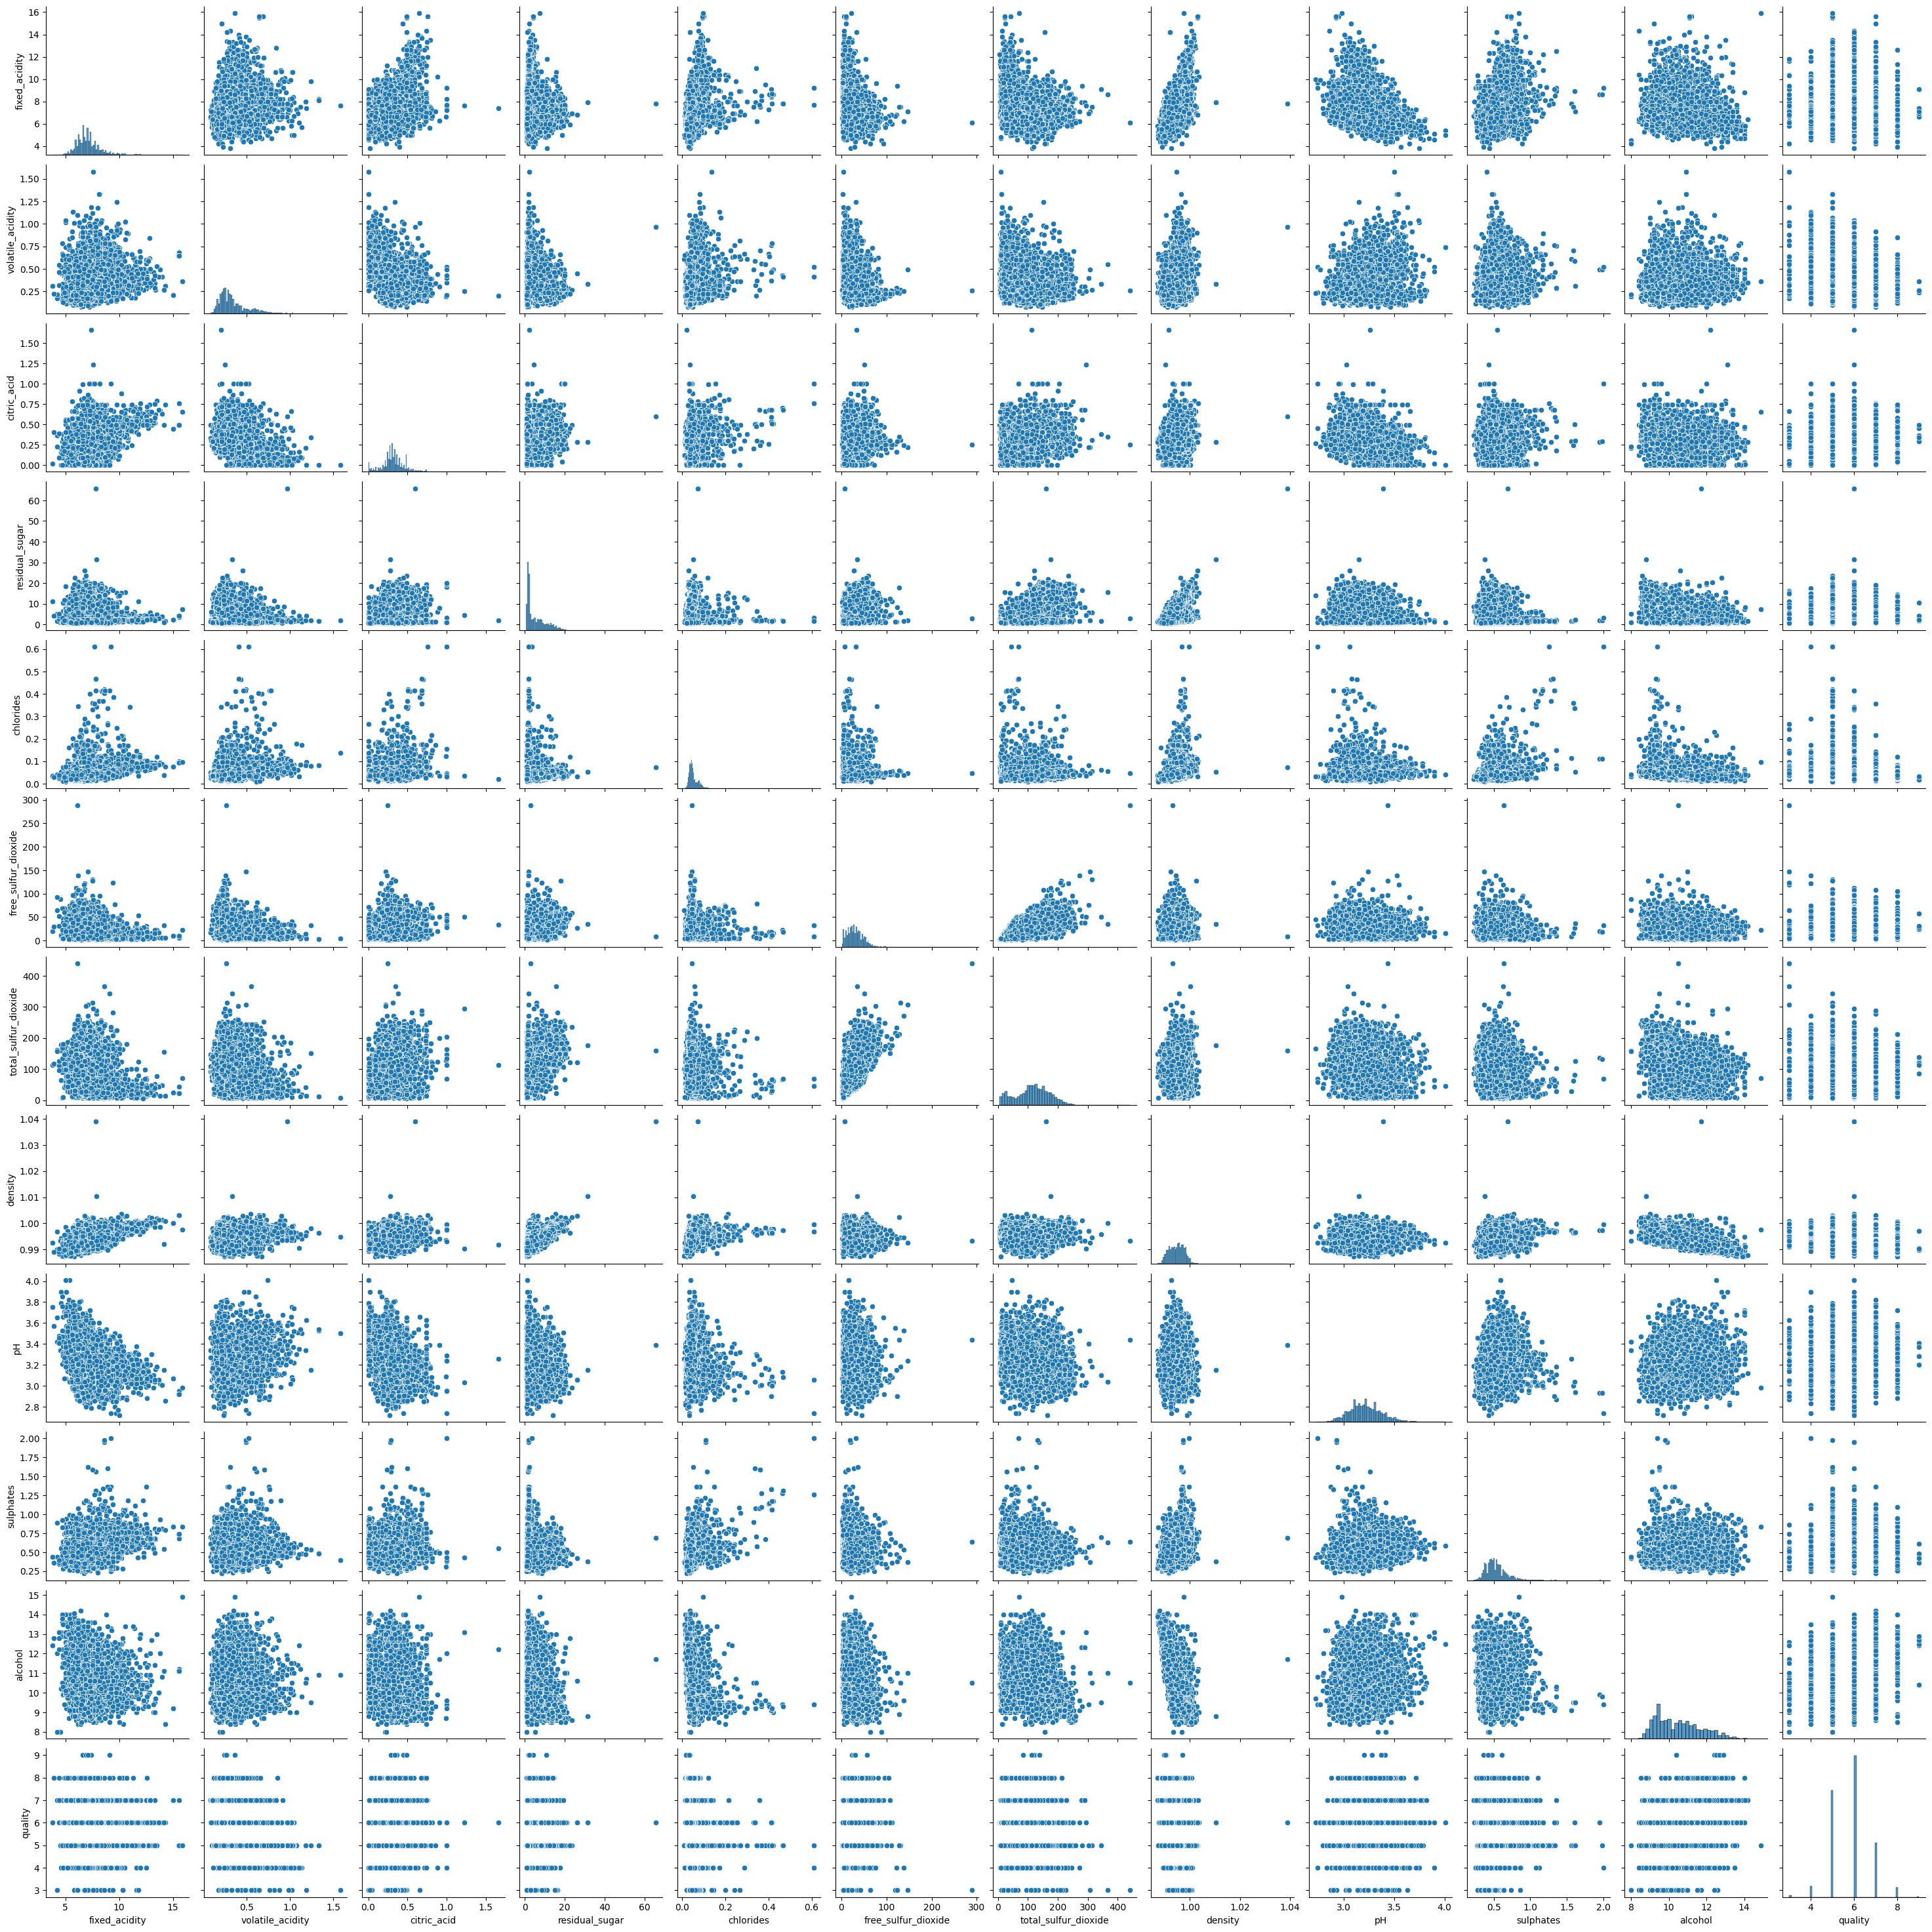

In [17]:
sns.pairplot(df)

In [18]:
# Columns with higher R-squared values might be considered more relevant for predicting

import statsmodels.formula.api as smf
import statsmodels.api as sm

for column in X.columns:
    Xs = X[[column]]
    Xs = sm.add_constant(Xs)
    model = sm.OLS(y, Xs)
    results = model.fit()
    print(column)
    print(results.rsquared)
    print("=============")

fixed_acidity
0.005889519960259659
volatile_acidity
0.07059621240300618
citric_acid
0.007315674644388759
residual_sugar
0.0013675562401985752
chlorides
0.04026664306486949
free_sulfur_dioxide
0.0030761508711117935
total_sulfur_dioxide
0.0017127557908347413
density
0.09354905870516639
pH
0.0003804724773961432
sulphates
0.001481129544312898
alcohol
0.19741894722167064


In [19]:
formula = 'quality ~ alcohol + volatile_acidity + density + chlorides'  # No interaction terms
model = smf.ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     592.3
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:54:06   Log-Likelihood:                -7327.1
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6492   BIC:                         1.470e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -35.6534      4.625  

chlorides does not appear to have a meaningful linear relationship with quality when alcohol, volatile_acidity, and density are already in the model.

# Models

When dealing with multivariate binary classification, where you have multiple input features and a binary outcome, several models are well-suited. Here are the ones I'm going to use:

* Logistic Regression: This is a foundational model for binary classification. It's interpretable, computationally efficient, and often performs well, especially when the relationship between features and the outcome is roughly linear

* Support Vector Machines (SVMs):
SVMs are powerful, particularly when dealing with high-dimensional data. They can handle non-linear relationships through the use of kernel functions.
They aim to find the optimal hyperplane that separates the two classes.

* Random Forests: This ensemble method combines multiple decision trees, reducing overfitting and improving accuracy.


I'll be also using GridSearchCV to automate the process of finding the best hyperparameters

In [24]:

# data (as pandas dataframes)
X = wine_quality.data.features[['alcohol', 'density', 'volatile_acidity']]
y = wine_quality.data.targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable for training data
y_train = le.fit_transform(y_train.values.ravel())
# Fit and transform the target variable for testing data to ensure consistency
y_test = le.transform(y_test.values.ravel())

# Add polynomial features
poly = PolynomialFeatures(degree=1)  # Set the degree of the polynomial
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform testing data

# Rest of your code for model training and evaluation remains the same

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Define hyperparameter grids for each model
param_grids = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10]}
}

initial_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_poly, y_train)  # Fit using polynomial features
    initial_models[model_name] = grid_search.best_estimator_

# Evaluate models on the test set (updated to use polynomial features)
for model_name, model in initial_models.items():
    y_pred = model.predict(X_test_poly)  # Predict using polynomial features
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

# Select the best performing model (updated to use polynomial features)
best_model = max(initial_models, key=lambda k: accuracy_score(y_test, initial_models[k].predict(X_test_poly)))
print(f'Best Model: {best_model}')

RandomForest Accuracy: 0.8723076923076923
SVM Accuracy: 0.8207692307692308
LogisticRegression Accuracy: 0.816923076923077
Best Model: RandomForest


## With Second Degree Polynomial Features

In [25]:

# data (as pandas dataframes)
X = wine_quality.data.features[['alcohol', 'density', 'volatile_acidity']]
y = wine_quality.data.targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable for training data
y_train = le.fit_transform(y_train.values.ravel())
# Fit and transform the target variable for testing data to ensure consistency
y_test = le.transform(y_test.values.ravel())

# Add polynomial features
poly = PolynomialFeatures(degree=2)  # Set the degree of the polynomial
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform testing data

# Rest of your code for model training and evaluation remains the same

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Define hyperparameter grids for each model
param_grids = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10]}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_poly, y_train)  # Fit using polynomial features
    best_models[model_name] = grid_search.best_estimator_

# Evaluate models on the test set (updated to use polynomial features)
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_poly)  # Predict using polynomial features
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy (with Polynomial Features): {accuracy}')

# Select the best performing model (updated to use polynomial features)
best_model = max(best_models, key=lambda k: accuracy_score(y_test, best_models[k].predict(X_test_poly)))
print(f'Best Model (with Polynomial Features): {best_model}')

RandomForest Accuracy (with Polynomial Features): 0.8669230769230769
SVM Accuracy (with Polynomial Features): 0.823076923076923
LogisticRegression Accuracy (with Polynomial Features): 0.816923076923077
Best Model (with Polynomial Features): RandomForest


## Applying SMOTE to balance the training data

In [27]:
X = wine_quality.data.features[['alcohol', 'density', 'volatile_acidity']]
y = wine_quality.data.targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize LabelEncoder (already present in the original code, but important)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Add polynomial features
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_resampled)  # Resampled training data
X_test_poly = poly.transform(X_test)

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, solver='liblinear') #added solver to remove warning
}

param_grids = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10]}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_poly, y_train_resampled)  # Use resampled data
    best_models[model_name] = grid_search.best_estimator_

for model_name, model in best_models.items():
    y_pred = model.predict(X_test_poly)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy (with Polynomial Features and SMOTE): {accuracy}')

best_model = max(best_models, key=lambda k: accuracy_score(y_test, best_models[k].predict(X_test_poly)))
print(f'Best Model (with Polynomial Features and SMOTE): {best_model}')

RandomForest Accuracy (with Polynomial Features and SMOTE): 0.8469230769230769
SVM Accuracy (with Polynomial Features and SMOTE): 0.7038461538461539
LogisticRegression Accuracy (with Polynomial Features and SMOTE): 0.7215384615384616
Best Model (with Polynomial Features and SMOTE): RandomForest


# Results and Analysis

In [31]:
y_pred = initial_models[best_model].predict(X_test_poly)

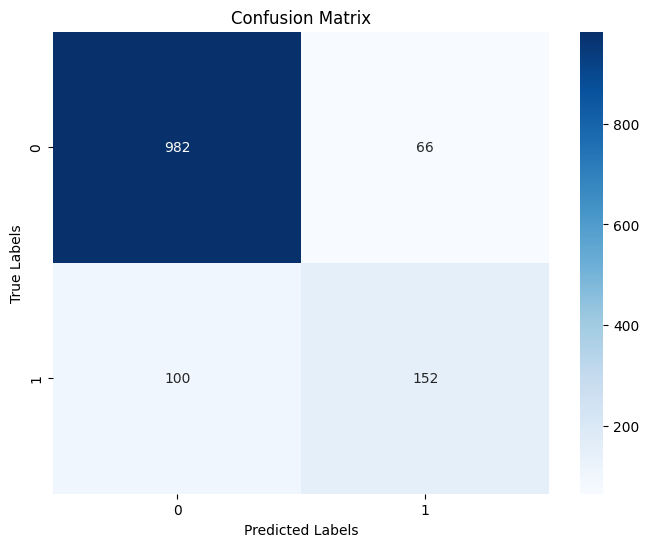

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix using seaborn
class_names = np.unique(y_pred) # Example class names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



True Positives (TP):  152.
True Negatives (TN): The model correctly predicted the negative class (0). In this case, TN = 982.
False Positives (FP): The model incorrectly predicted the positive class (1) when it was actually negative (0). In this case, FP = 66.
False Negatives (FN): The model incorrectly predicted the negative class (0) when it was actually positive (1). In this case, FN = 100.
Analysis

High True Negatives (TN): The model is excellent at correctly identifying the negative class (0).
Moderate True Positives (TP): The model correctly identifies a decent number of positive cases (1), but there's room for improvement.
Relatively High False Negatives (FN): The model misses a significant number of actual positive cases (1). This is a concern if the cost of missing a positive case is high.
Low False Positives (FP): The model rarely predicts a positive case (1) when it's actually negative (0).
Further Evaluation Metrics

* Accuracy: 87.2%

The model is correct about 87.2% of the time.
* Precision (for class 1): 69.7%

When the model predicts class 1, it's correct about 69.7% of the time.
* Recall (Sensitivity, for class 1): 60.3%

The model captures about 60.3% of all actual positive cases (1).
* F1-Score (for class 1): 64.7%

The F1-score balances precision and recall.
Interpretation



In [33]:
pd.Series(y_test).value_counts()

,count
0,1048
1,252


# Discussion and conclussion

Despite the initial cleanliness of the dataset, a significant number of features proved to be irrelevant to the prediction task. To enhance clarity, the target variable was transformed into a binary classification problem.

Following feature selection, a comprehensive analysis was conducted, exploring various models with multiple parameter configurations, including the application of polynomial features. Among the models evaluated, the Random Forest Classifier, utilizing 200 estimators and excluding polynomial features, yielded the most favorable results.

However, an evaluation of the model's performance on the test data, as measured by the confusion matrix, precision, recall, and F1-score, reveals that it is not a highly effective classifier. The primary limitation appears to stem from the fact that the selected group of features may not be a strong predictor of the target variable's quality.

Additional challenges that likely contributed to the model's performance include:

Data Imbalance: The substantial disparity between true negatives and true positives indicates a significant class imbalance within the dataset. This imbalance, with a considerably higher proportion of negative cases compared to positive cases, can hinder a model's ability to accurately identify the minority class.
Bias Towards the Negative Class: As a consequence of the class imbalance, the model exhibits a tendency to favor predictions of the negative class. This bias is a common characteristic of models trained on imbalanced datasets.